In [79]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [80]:
from tests.leandro.tools import *
from omegaconf import OmegaConf
from data._main import get_dataset
from tests.leandro.plots import *
import pandas as pd
%matplotlib inline

In [81]:
# Real data
config = OmegaConf.load("/home/lrvnc/projects/worm-graph/conf/dataset.yaml")
print("\nconfig:\n\t", OmegaConf.to_yaml(config), end="\n\n")
dataset = get_dataset(config)
oneWorm = dataset['worm0']
caData = oneWorm['smooth_calcium_data']


config:
	 dataset:
  name:
  - Kato2015


Chosen dataset(s): ['Kato2015']
Num. worms: 12



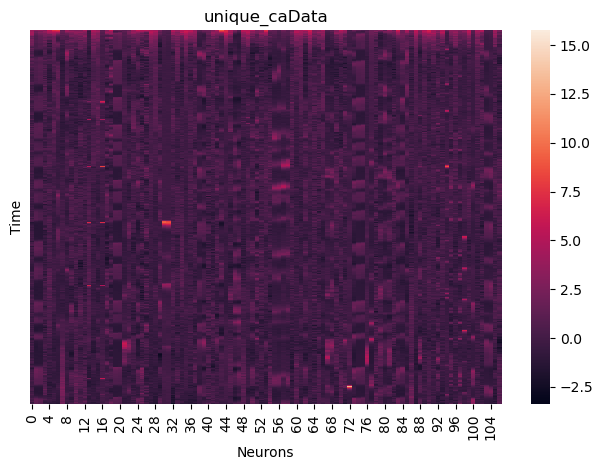

In [82]:
unique_idx = np.where(oneWorm['neurons_mask']==True)[0]
idx2unique = {pos: idx for pos, idx in enumerate(unique_idx)}
unique_caData = caData[:, oneWorm['neurons_mask']]
plotHeatmap(unique_caData, title="unique_caData", show_yticks=False, show_xticks=True, xlabel='Neurons', ylabel='Time')

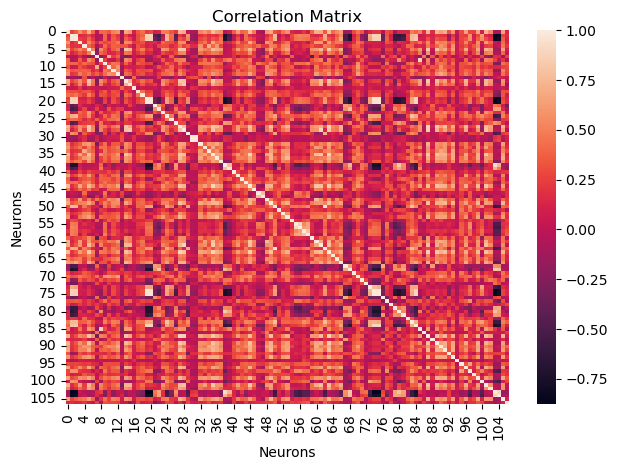

In [83]:
corr_matrix = correlation_matrix(unique_caData)
plotHeatmap(corr_matrix, title="Correlation Matrix", show_xticks=True, show_yticks=True, xlabel='Neurons', ylabel='Neurons')

In [84]:
high_corr = np.where(corr_matrix > 0.75)
low_corr = np.where(corr_matrix < -0.75)

hcorr, lcorr = [], []

for i in range(len(high_corr[0])):
    if high_corr[0][i] != high_corr[1][i]:
        hcorr.append([high_corr[0][i], high_corr[1][i]])

for i in range(len(low_corr[0])):
    if low_corr[0][i] != low_corr[1][i]:
        lcorr.append([low_corr[0][i], low_corr[1][i]])

hcorr = np.array(hcorr)
lcorr = np.array(lcorr)

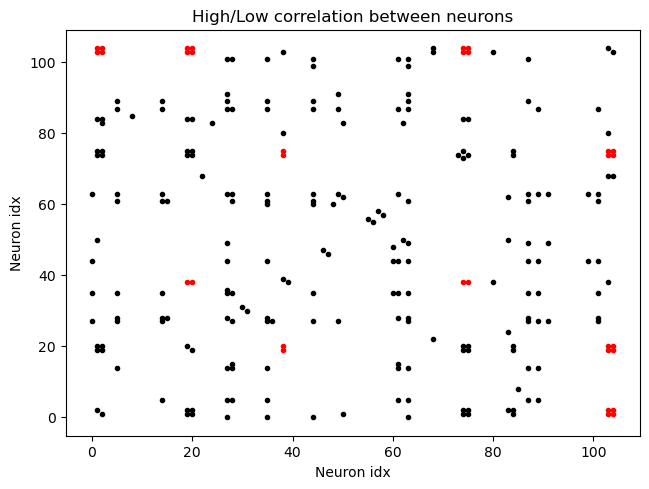

In [85]:
plt.plot(hcorr[:, 0], hcorr[:, 1], '.', color='black', label='High correlation')
plt.plot(lcorr[:, 0], lcorr[:, 1], '.', color='red', label='Low correlation')
#plt.legend()
plt.title("High/Low correlation between neurons")
plt.tight_layout()
plt.ylabel("Neuron idx")
plt.xlabel("Neuron idx")
plt.show()

Is it consistent for all worms?

In [86]:
def corr_oneWorm(oneWorm):

    caData = oneWorm['smooth_calcium_data']
    unique_idx = np.where(oneWorm['neurons_mask'] == True)[0]
    idx2unique = {pos: idx for pos, idx in enumerate(unique_idx)}
    unique_caData = caData[:, oneWorm['neurons_mask']]

    corr_matrix = correlation_matrix(unique_caData)

    _, _, corr_threshold = surrogate_test(unique_caData.detach().numpy(), num_surrogates=1000)

    high_corr = np.where(corr_matrix > corr_threshold)
    low_corr = np.where(corr_matrix < -corr_threshold)

    hcorr, lcorr = [], []

    for i in range(len(high_corr[0])):
        if high_corr[0][i] != high_corr[1][i]:
            hcorr.append([high_corr[0][i], high_corr[1][i]])

    for i in range(len(low_corr[0])):
        if low_corr[0][i] != low_corr[1][i]:
            lcorr.append([low_corr[0][i], low_corr[1][i]])

    hcorr_unique = np.array(hcorr).copy()
    hcorr = np.apply_along_axis(lambda x: [unique_idx[x[0]], unique_idx[x[1]]], 1, hcorr_unique)
    lcorr_unique = np.array(lcorr).copy()
    lcorr = np.apply_along_axis(lambda x: [unique_idx[x[0]], unique_idx[x[1]]], 1, lcorr_unique)

    return {
        'coor_matrix': corr_matrix,
        'hcorr': hcorr,
        'hcorr_unique': hcorr_unique,
        'lcorr': lcorr,
        'lcorr_unique': lcorr_unique,
        'corr_threshold': corr_threshold
    }

corr_data = {}

for wormID in dataset.keys():
    oneWorm = dataset[wormID]
    corr_data[wormID] = corr_oneWorm(oneWorm)

df = pd.DataFrame(corr_data)
df.head()

,worm0,worm1,worm2,worm3,worm4,worm5,worm6,worm7,worm8,worm9,worm10,worm11
coor_matrix,"[[0.9999999999999999, 0.25196189314291784, 0.3...","[[1.0, -0.16505154150707324, 0.440303566600309...","[[1.0, 0.07617813673082859, -0.120090895496523...","[[1.0, 0.42293539567290905, 0.7067039620778445...","[[1.0, 0.2909400163565006, 0.22803639540532195...","[[1.0, 0.5566483138640803, -0.0783319932597633...","[[1.0, -0.19173038343209964, -0.50087726036630...","[[1.0, 0.2837654820668311, 0.4273094511077461,...","[[1.0, 0.3954785347552443, 0.3836551824646395,...","[[0.9999999999999999, 0.26550347032410526, -0....","[[1.0, 0.3304277769924315, 0.30856840565497473...","[[1.0, 0.10478226874340286, 0.4871794523953454..."
hcorr,"[[10, 12], [10, 13], [10, 15], [10, 16], [10, ...","[[1, 6], [1, 8], [1, 10], [1, 11], [1, 12], [1...","[[4, 8], [4, 22], [4, 33], [4, 34], [4, 37], [...","[[0, 1], [0, 5], [0, 11], [0, 12], [0, 22], [0...","[[0, 1], [0, 3], [0, 7], [0, 10], [0, 12], [0,...","[[0, 2], [0, 8], [0, 9], [0, 11], [0, 12], [0,...","[[1, 9], [1, 11], [1, 25], [1, 26], [1, 27], [...","[[3, 7], [3, 12], [3, 13], [3, 21], [3, 22], [...","[[2, 3], [2, 5], [2, 18], [2, 20], [2, 22], [2...","[[0, 1], [0, 9], [0, 12], [0, 13], [0, 16], [0...","[[3, 7], [3, 8], [3, 12], [3, 13], [3, 19], [3...","[[0, 1], [0, 4], [0, 5], [0, 6], [0, 15], [0, ..."
hcorr_unique,"[[0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6...","[[0, 2], [0, 4], [0, 6], [0, 7], [0, 8], [0, 9...","[[0, 3], [0, 7], [0, 10], [0, 11], [0, 12], [0...","[[0, 1], [0, 2], [0, 4], [0, 5], [0, 8], [0, 9...","[[0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6...","[[0, 1], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8...","[[0, 3], [0, 4], [0, 8], [0, 9], [0, 10], [0, ...","[[0, 1], [0, 2], [0, 3], [0, 5], [0, 6], [0, 7...","[[0, 1], [0, 2], [0, 7], [0, 9], [0, 10], [0, ...","[[0, 1], [0, 4], [0, 6], [0, 7], [0, 9], [0, 1...","[[0, 1], [0, 2], [0, 3], [0, 4], [0, 7], [0, 8...","[[0, 1], [0, 2], [0, 3], [0, 4], [0, 8], [0, 9..."
lcorr,"[[12, 55], [12, 56], [12, 62], [12, 97], [12, ...","[[1, 3], [1, 9], [1, 22], [1, 27], [1, 34], [1...","[[4, 12], [4, 26], [4, 28], [4, 53], [4, 54], ...","[[0, 6], [0, 13], [0, 18], [0, 33], [0, 35], [...","[[0, 21], [0, 22], [0, 23], [0, 43], [0, 58], ...","[[0, 4], [0, 23], [0, 27], [0, 31], [0, 33], [...","[[1, 4], [1, 6], [1, 12], [1, 13], [1, 49], [1...","[[3, 19], [3, 32], [3, 62], [3, 65], [3, 68], ...","[[2, 12], [2, 13], [2, 53], [2, 54], [2, 59], ...","[[0, 7], [0, 15], [0, 18], [0, 24], [0, 35], [...","[[3, 32], [3, 55], [3, 56], [3, 91], [3, 92], ...","[[0, 13], [0, 19], [0, 45], [0, 53], [0, 54], ..."
lcorr_unique,"[[1, 21], [1, 22], [1, 26], [1, 38], [1, 39], ...","[[0, 1], [0, 5], [0, 12], [0, 14], [0, 16], [0...","[[0, 4], [0, 8], [0, 9], [0, 16], [0, 17], [0,...","[[0, 3], [0, 6], [0, 7], [0, 12], [0, 14], [0,...","[[0, 7], [0, 8], [0, 9], [0, 17], [0, 25], [0,...","[[0, 2], [0, 13], [0, 14], [0, 15], [0, 17], [...","[[0, 1], [0, 2], [0, 5], [0, 6], [0, 17], [0, ...","[[0, 4], [0, 9], [0, 23], [0, 25], [0, 26], [0...","[[0, 5], [0, 6], [0, 22], [0, 23], [0, 26], [0...","[[0, 3], [0, 8], [0, 10], [0, 12], [0, 17], [0...","[[0, 16], [0, 23], [0, 24], [0, 36], [0, 37], ...","[[0, 7], [0, 10], [0, 17], [0, 22], [0, 23], [..."


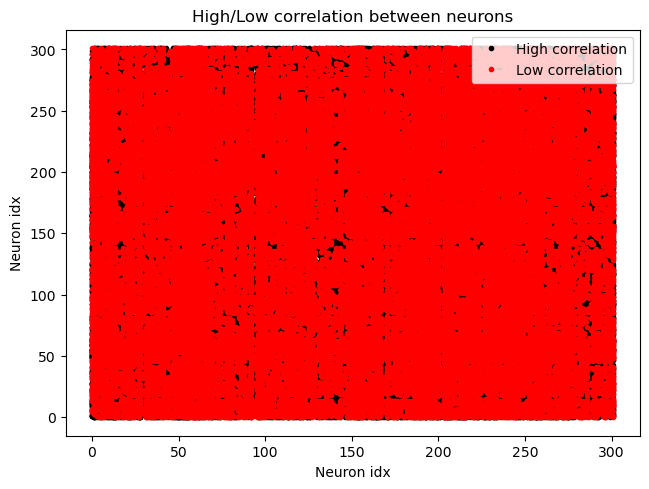

In [91]:
# plot all hcor and lcor points in same plot
hcorr = np.concatenate([corr_data[wormID]['hcorr'] for wormID in corr_data.keys()], axis=0)
lcorr = np.concatenate([corr_data[wormID]['lcorr'] for wormID in corr_data.keys()], axis=0)
plt.plot(hcorr[:, 0], hcorr[:, 1], '.', color='black', label='High correlation')
plt.plot(lcorr[:, 0], lcorr[:, 1], '.', color='red', label='Low correlation')
plt.legend()
plt.title("High/Low correlation between neurons")
plt.tight_layout()
plt.ylabel("Neuron idx")
plt.xlabel("Neuron idx")
plt.show()

In [92]:
# find the biggest value in hcorr and lcorr
hcorr = np.concatenate([corr_data[wormID]['hcorr_unique'] for wormID in corr_data.keys()], axis=0)
lcorr = np.concatenate([corr_data[wormID]['lcorr_unique'] for wormID in corr_data.keys()], axis=0)
np.max(hcorr), np.max(lcorr)

(150, 150)

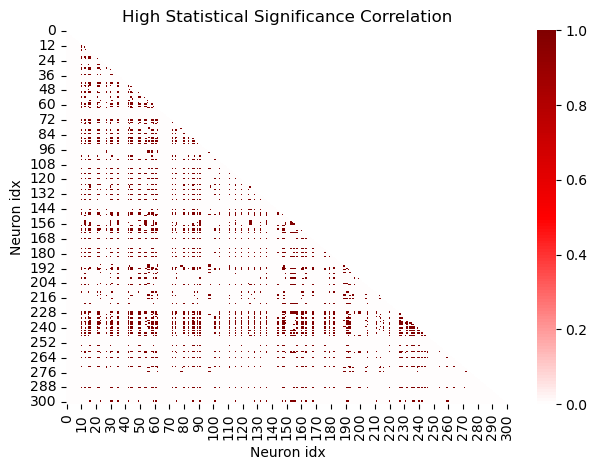

In [95]:
zero_matrix = np.zeros((302, 302))
h_matrix_sequence = []

for pos in [corr_data[wormID]['hcorr'] for wormID in corr_data.keys()]:
    zero_matrix[pos[:,0], pos[:,1]] += 1
    h_matrix_sequence.append(zero_matrix.copy())

dynamicHeatmap(h_matrix_sequence, title="High Statistical Significance Correlation", cmap='seismic', center=0, mask='upper_t', show_xticks=True, show_yticks=True, xlabel='Neuron idx', ylabel='Neuron idx', filename='/home/lrvnc/projects/worm-graph/tests/leandro/data/hcorr.mp4')

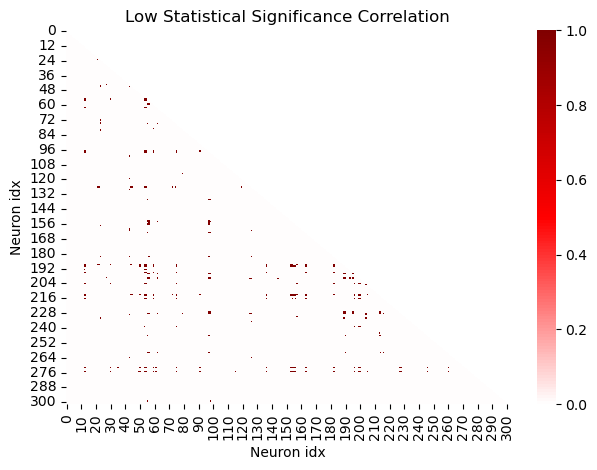

In [96]:
zero_matrix = np.zeros((302, 302))
l_matrix_sequence = []

for pos in [corr_data[wormID]['lcorr'] for wormID in corr_data.keys()]:
    zero_matrix[pos[:,0], pos[:,1]] += 1
    l_matrix_sequence.append(zero_matrix.copy())

dynamicHeatmap(l_matrix_sequence, title="Low Statistical Significance Correlation", cmap='seismic', center=0, mask='upper_t', show_xticks=True, show_yticks=True, xlabel='Neuron idx', ylabel='Neuron idx', filename='/home/lrvnc/projects/worm-graph/tests/leandro/data/lcorr.mp4')

In [73]:
# apply surrogate test
oneWorm = dataset['worm1']
caData = oneWorm['smooth_calcium_data']
unique_idx = np.where(oneWorm['neurons_mask'] == True)[0]
idx2unique = {pos: idx for pos, idx in enumerate(unique_idx)}
unique_caData = caData[:, oneWorm['neurons_mask']]
observed_corr, surrogate_corrs, surrogate_summary, p_values = surrogate_test(unique_caData.detach().numpy())

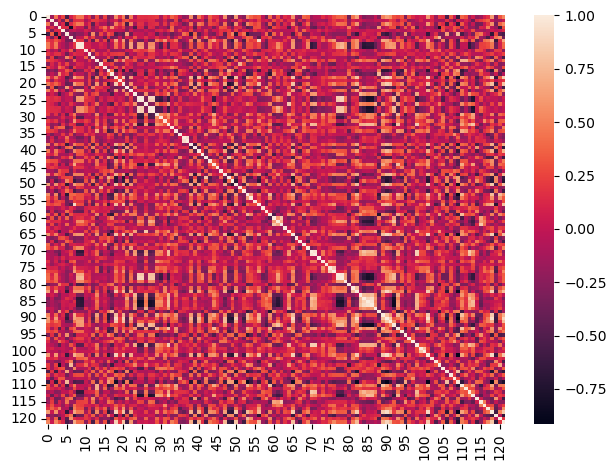

In [74]:
plotHeatmap(observed_corr)

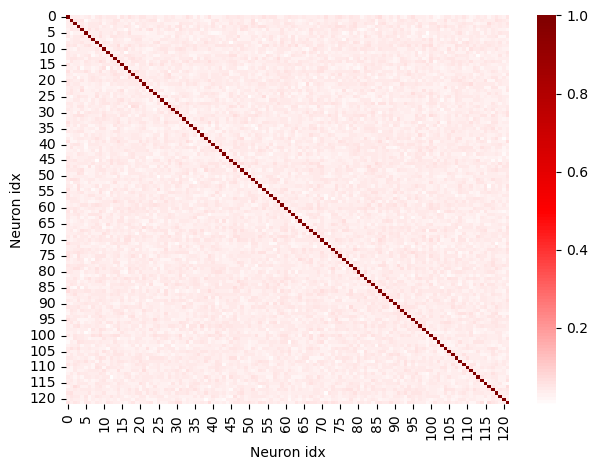

In [75]:
plotHeatmap(surrogate_summary, cmap='seismic', center=0, show_xticks=True, show_yticks=True, xlabel='Neuron idx', ylabel='Neuron idx')

In [76]:
p_values

0.515049717817791